[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [2]:
!pip install transformers[sentencepiece] datasets

## Datasets library

In [3]:
from datasets import list_datasets
list_datasets()

ImportError: cannot import name 'list_datasets' from 'datasets' (/usr/local/lib/python3.11/dist-packages/datasets/__init__.py)

In [4]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [9]:
imdb['train'][0]['text']

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [10]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [11]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [12]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [13]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [14]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [15]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [16]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [17]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [18]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [20]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"This movie will not sit well with some, but it is a must view. I am glad someone finally brought up for discussion the realities of HOW African American couples worked to make a name in communities and how many of them felt trying to stay there a...",1
1284,"The cliché of the shell-shocked soldier home from the war is here given dull treatment. Pity a splendid cast, acting to the limits of their high talents, can't redeem 'The Return of the Soldier' from its stiff-collared inability to move the viewe...",0
408,"This movie is most possibly the worst movie I have ever see in my entire life! The plot is ridiculous and the whole ""Little Man"" crap is just so stupid. The entire movie is unrealistic and dumb. Let's face it, It's just a ""Black Comedy"". This is ...",0
1282,"By now you should already know about this film, the Jessica Simpson ""bomb"" that pretty much went straight to video (limited, anemic theatrical run). Basically, Ms. Simpson's Katie travels from a small town in Oklahoma to visit her boyfriend, to s...",0
1447,Reed Diamond plays a man suffering from amnesia who's been in a mental asylum for over a decade after he was found wondering the back roads with blood on his hands. The doctors want to test out an experimental new drug that'll return his lost mem...,0
1144,"When i first saw the title i was already deducing the theme of the film - it clearly wasn't a reference to British currency, so it had to be Shakespearian and about pounds of flesh - taking them, or giving them. Will Smith's a feelgood actor, so ...",1
1381,"""Gespenster"" Question of to be cool in the German cinema<br /><br />There are not many German films in the last ten years, who have made me so interest. Yes, the problem of the most German films are in this film ""Gespenster"" too. He is on some pl...",1
181,"I may be biased, I am the author of the novel The Hungry Bachelors Club, self-published in 1994. The screenplay was written by my good friend and hungry bachelor, Fred Dresch, who was the inspiration for the character Marlon in the film. I couldn...",1
1183,"Many people here say that this show is for kids only. Hm, when I was a kid (approximately 7-9 years old) I watched this show first. It was disgusting for me. I talked with other kids about this and, sure, other shows and know what? This was the m...",0
1103,"ok. for starters, taxi driver is amazing. this, this is not taxi driver or amazing. what it is is bad. but i thought it was bad funny, which means that it did have some redeeming qualities. like the dialogue...wow. there was more or less no plot,...",0


In [21]:
df.loc[0, 'text']

"Highly enjoyable, very imaginative, and filmic fairytale all rolled into one, Stardust tells the story of a young man living outside a fantasy world going inside it to retrieve a bit of a fallen star only to find the star is alive, young, and beautiful. A kingdom whose king is about to die has said king unleash a competition on his several sons to see who can retrieve a ruby first to be king whilst a trio of witches want the star to carve up and use to keep them young. These three plot threads weave intricately together throughout the entire picture blended with good acting, dazzling special effects, and some solid sentiment and humour as well. Stardust is a fun film and has some fun performances from the likes of Claire Danes as the star(I could gaze at her for quite some time) to Michelle Pfeiffer(I could gaze at her at full magical powers even longer) playing the horrible witch to Robert Deniro playing a nancy-boy air pirate to perfection. Charlie Cox as the lead Tristan is affable

In [22]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"Highly enjoyable, very imaginative, and filmic fairytale all rolled into one, Stardust tells the story of a young man living outside a fantasy world going inside it to retrieve a bit of a fallen star only to find the star is alive, young, and beautiful. A kingdom whose king is about to die has said king unleash a competition on his several sons to see who can retrieve a ruby first to be king whilst a trio of witches want the star to carve up and use to keep them young. These three plot threads weave intricately together throughout the entire picture blended with good acting, dazzling special effects, and some solid sentiment and humour as well. Stardust is a fun film and has some fun performances from the likes of Claire Danes as the star(I could gaze at her for quite some time) to Michelle Pfeiffer(I could gaze at her at full magical powers even longer) playing the horrible witch to Robert Deniro playing a nancy-boy air pirate to perfection. Charlie Cox as the lead Tristan is affable

In [24]:
df.label.value_counts()

,count
label,
0,821
1,779


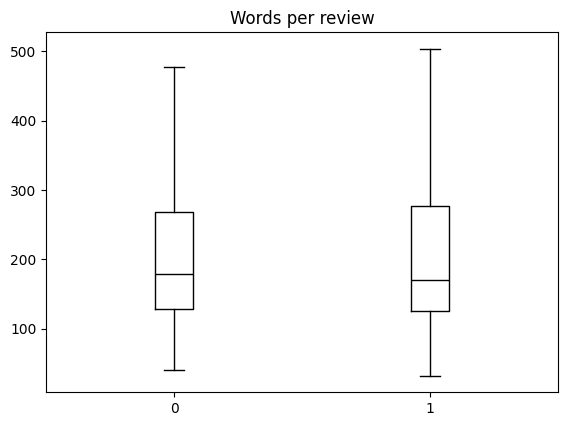

In [25]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [26]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
229,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
247,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
415,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
499,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
1278,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36


In [27]:
imdb.reset_format()

## Tokenizer

In [28]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [29]:
print(imdb_encoded['train'][0])

{'text': "Highly enjoyable, very imaginative, and filmic fairytale all rolled into one, Stardust tells the story of a young man living outside a fantasy world going inside it to retrieve a bit of a fallen star only to find the star is alive, young, and beautiful. A kingdom whose king is about to die has said king unleash a competition on his several sons to see who can retrieve a ruby first to be king whilst a trio of witches want the star to carve up and use to keep them young. These three plot threads weave intricately together throughout the entire picture blended with good acting, dazzling special effects, and some solid sentiment and humour as well. Stardust is a fun film and has some fun performances from the likes of Claire Danes as the star(I could gaze at her for quite some time) to Michelle Pfeiffer(I could gaze at her at full magical powers even longer) playing the horrible witch to Robert Deniro playing a nancy-boy air pirate to perfection. Charlie Cox as the lead Tristan i

## Tiny IMDB

In [30]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageTextToText',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForKeypointDetection',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 '

In [31]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [37]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False

In [38]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-38-e08ed3d7ec7a>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


Epoch,Training Loss,Validation Loss
1,0.635400,0.674032
2,0.553700,0.663536
3,0.444500,0.605708
4,0.327100,0.781279
5,0.231700,0.904227
6,0.082800,1.055198
7,0.039000,1.081438
8,0.033000,1.387453
9,0.012200,1.558076
10,0.006600,1.683721


In [39]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-1.5549359,  1.272637 ],
       [ 6.219623 , -6.157104 ],
       [ 6.0594482, -5.7985177],
       [ 6.4581237, -6.3060923],
       [ 5.2638626, -5.2757325],
       [ 6.3229685, -6.197518 ],
       [ 6.265418 , -6.043507 ],
       [ 6.3800297, -6.204991 ],
       [ 6.3161616, -6.1690145],
       [ 4.9771423, -5.2157607]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 3.999249219894409, 'test_runtime': 0.0672, 'test_samples_per_second': 148.811, 'test_steps_per_second': 29.762})

In [40]:
preds.predictions.shape

(10, 2)

In [41]:
preds.predictions.argmax(axis=-1)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.6

In [44]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [45]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-45-244be4004a60>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000000,4.440434,0.600000
2,0.000000,4.359321,0.600000
3,0.000000,4.214427,0.600000
4,0.000000,3.891282,0.700000
5,0.000000,4.171106,0.600000


KeyboardInterrupt: 

## Training run

In [47]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [48]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-48-d685038c6b50>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


Epoch,Training Loss,Validation Loss,Accuracy
1,0.824300,0.353042,0.850000
2,0.243800,0.357316,0.862500


In [49]:


trainer.evaluate()

{'eval_loss': 0.35731637477874756,
 'eval_accuracy': 0.8625,
 'eval_runtime': 2.8758,
 'eval_samples_per_second': 139.093,
 'eval_steps_per_second': 8.693,
 'epoch': 2.0}

In [50]:
trainer.save_model()

In [51]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [52]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.8007110953330994}]

In [53]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.6807130575180054}]